In [30]:
import pandas as pd
import datetime
import numpy as np
import math
import re
from matplotlib import pyplot as plt
import tensorflow as tf

coffee_prices = pd.read_csv('data/coffee-prices.csv')
coffee_prices["date"] = pd.to_datetime(coffee_prices['date'])
mask = (coffee_prices['date'] >= datetime.datetime(2019,1,1)) & (coffee_prices['date'] <= datetime.datetime(2019,12,31))
coffee_prices = coffee_prices.loc[mask]

oil_prices = pd.read_csv('data/oil-prices.csv')
oil_prices['date'] = pd.to_datetime(oil_prices['date'])
mask = (oil_prices['date'] >= datetime.datetime(2019,1,1)) & (oil_prices['date'] <= datetime.datetime(2019,12,31))
oil_prices = oil_prices.loc[mask]

stock_prices = pd.read_csv('data/colcap-prices.csv')[['Fecha','ultimo']]
stock_prices['Fecha'] = pd.to_datetime(stock_prices['Fecha'])
stock_prices['ultimo'] = pd.to_numeric(stock_prices['ultimo'])
stock_prices.columns = ['date','close']

exchange_rates = pd.read_csv("data/exchange-rates.csv")[["Date","Open"]]
exchange_rates['Date'] = pd.to_datetime(exchange_rates['Date'])
exchange_rates.columns = ['date','open']

In [58]:
all_data = pd.merge(coffee_prices, oil_prices, 'inner','date')
all_data.columns = ['date','coffee','oil']
all_data = pd.merge(all_data,stock_prices,'inner','date')
all_data.columns = ['date','coffee','oil','stock']
all_data = pd.merge(all_data,exchange_rates,'inner','date')
all_data.columns = ['date','coffee','oil','stock','dollar']
all_data = all_data.drop(columns=['date'])
all_data = all_data.to_numpy()
d1 = np.delete(all_data,0,0)
d2 = np.delete(all_data, all_data.shape[0]-1,0)
all_data = np.subtract(d1,d2)
all_data = pd.DataFrame(all_data, columns=['coffee_change','oil_change','stock_change','dollar_change'])
all_data.dollar_change = all_data.dollar_change.shift(-1)
all_data.drop(all_data.tail(1).index,inplace=True)
print(all_data)

     coffee_change  oil_change  stock_change  dollar_change
0           0.0265        0.61         15.73           5.50
1          -0.0055        0.84          8.22         -63.94
2           0.0345        1.82         11.49         -29.36
3           0.0025        2.61          9.37         -15.20
4          -0.0105        0.23          6.46           1.65
..             ...         ...           ...            ...
231         0.0350       -0.87         -3.86          16.50
232        -0.0540        0.08         22.18         -20.50
233         0.0410        0.66          1.58         -12.73
234        -0.0210        0.55         -6.73         -10.02
235         0.0520        0.04          1.32          13.75

[236 rows x 4 columns]


In [126]:
trainning_data = all_data.to_numpy()
trainning_data = np.swapaxes(trainning_data, 0, 1)
coffee, oil, stock, dollar = trainning_data

coffee = tf.keras.utils.normalize(coffee)
oil = tf.keras.utils.normalize(oil)
stock = tf.keras.utils.normalize(stock)

def categorize(array):
    newArray = []
    for i in array:
        if i > 0:
            newArray.append(1)
        else:
            newArray.append(-1)
    return newArray

labels = categorize(dollar)

trainning_data = np.array([coffee,oil,stock]).T.tolist()

model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(1,activation=tf.nn.tanh))

model.compile(optimizer='adam', loss=tf.keras.losses.Hinge(), metrics=['accuracy'])

model.fit(trainning_data, labels, epochs=5)

Epoch 1/5
8/8 [==============================] - 0s 2ms/step - loss: 0.9938 - accuracy: 0.0000e+00
Epoch 2/5
8/8 [==============================] - 0s 2ms/step - loss: 0.9935 - accuracy: 0.0000e+00
Epoch 3/5
8/8 [==============================] - 0s 2ms/step - loss: 0.9932 - accuracy: 0.0000e+00
Epoch 4/5
8/8 [==============================] - 0s 2ms/step - loss: 0.9930 - accuracy: 0.0000e+00
Epoch 5/5
8/8 [==============================] - 0s 2ms/step - loss: 0.9927 - accuracy: 0.0000e+00


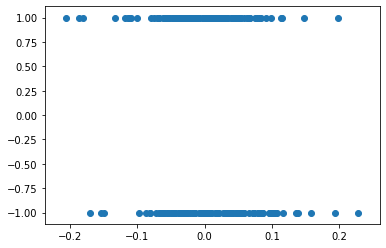

In [124]:
plt.scatter(coffee, labels)

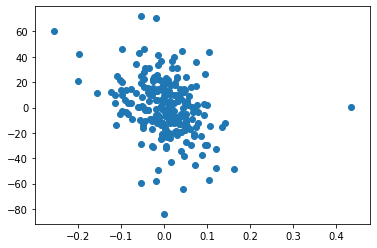

In [127]:
plt.scatter(oil,dollar)

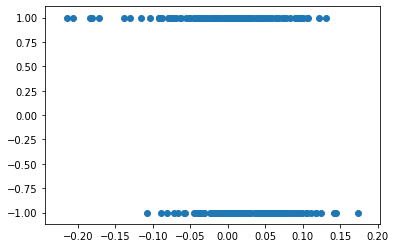

In [128]:
plt.scatter(stock,labels)

In [129]:
print(trainning_data)

[[[0.07510239179432833, 0.03178746695236061, 0.08360567308691445]], [[-0.015587288862973928, 0.043772905311447244, 0.0436896778623292]], [[0.09777481195865349, 0.09484129484146947, 0.06106987817982497]], [[0.007085131301351557, 0.1360086700748545, 0.04980198072627962]], [[-0.029757551465677042, 0.011985438359087006, 0.03433519695749967]], [[-0.011336210082162743, -0.05106838953002222, 0.02290784812489608]], [[-0.031174577725947228, -0.05888497976420882, 0.02561852156890794]], [[-0.04109376154784041, 0.07764479632625769, -0.0005846550565525255]], [[0.031174577725947856, 0.014590968437149205, -0.009301330445143047]], [[0.0, -0.013027650390311738, 0.00042520367749307534]], [[0.07226833927378765, 0.09223576476340727, 0.008132020332039205]], [[-0.04534484032865097, -0.05263170757685932, 0.05841235519549838]], [[0.0014170262602701854, -0.007816590234187338, 0.013712818599124791]], [[0.05384699789027271, 0.026055300780623476, 0.054426070719008506]], [[0.0425107878081106, 0.03074525492113588, 

In [130]:
print(labels)

[1, -1, -1, -1, 1, 1, 1, 1, -1, 1, -1, 1, 1, 1, -1, 1, -1, 1, -1, -1, -1, 1, -1, 1, -1, 1, -1, 1, 1, -1, -1, -1, 1, -1, -1, -1, -1, 1, 1, -1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, 1, 1, 1, 1, -1, 1, -1, 1, -1, 1, -1, -1, -1, -1, 1, -1, 1, 1, -1, 1, 1, 1, 1, -1, 1, -1, 1, -1, 1, 1, -1, -1, -1, 1, -1, -1, 1, 1, 1, -1, -1, 1, -1, 1, -1, 1, 1, -1, 1, -1, -1, -1, -1, 1, 1, 1, 1, -1, -1, -1, 1, -1, -1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, 1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, -1, -1, 1, 1, -1, 1, 1, -1, -1, -1, 1, 1, 1, 1, 1, -1, 1, 1, -1, -1, -1, 1, -1, 1, -1, -1, 1, 1, -1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, -1, -1, 1, 1, 1, -1, -1, 1, 1, -1, -1, 1, -1, -1, 1, -1, -1, -1, 1, -1, -1, -1, 1, -1, 1, 1, 1, 1, -1, 1, -1, 1, -1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, 1, -1, -1, -1, 1]
